<a href="https://colab.research.google.com/github/joncalle/ML2/blob/main/ChurnEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [220]:
# loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Business Analytics/E-Commerce Churn Data.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,5620,5621,5622,5623,5624,5625,5626,5627,5628,5629
CustomerID,50001,50002,50003,50004,50005,50006,50007,50008,50009,50010,...,55621,55622,55623,55624,55625,55626,55627,55628,55629,55630
Churn,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
Tenure,4.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,13.0,NaN,...,3.0,14.0,13.0,5.0,1.0,10.0,13.0,1.0,23.0,8.0
PreferredLoginDevice,Mobile Phone,Phone,Phone,Phone,Phone,Computer,Phone,Phone,Phone,Phone,...,Mobile Phone,Mobile Phone,Mobile Phone,Computer,Mobile Phone,Computer,Mobile Phone,Mobile Phone,Computer,Mobile Phone
CityTier,3,1,1,3,1,1,3,1,3,1,...,1,3,3,1,3,1,1,1,3,1
WarehouseToHome,6.0,8.0,30.0,15.0,12.0,22.0,11.0,6.0,9.0,31.0,...,35.0,35.0,31.0,12.0,12.0,30.0,13.0,11.0,9.0,15.0
PreferredPaymentMode,Debit Card,UPI,Debit Card,Debit Card,CC,Debit Card,Cash on Delivery,CC,E wallet,Debit Card,...,Credit Card,E wallet,E wallet,Credit Card,UPI,Credit Card,Credit Card,Debit Card,Credit Card,Credit Card
Gender,Female,Male,Male,Male,Male,Female,Male,Male,Male,Male,...,Female,Male,Female,Male,Female,Male,Male,Male,Male,Male
HourSpendOnApp,3.0,3.0,2.0,2.0,NaN,3.0,2.0,3.0,NaN,2.0,...,4.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0
NumberOfDeviceRegistered,3,4,4,4,3,5,3,3,4,5,...,5,5,5,4,5,2,5,2,5,2


In [221]:
#To check the data information which will help in cleaning the dataset
df.info()
#To check the list of columns
columns = df.columns.to_list()
columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [222]:
# To select the columns that are non-numeric
from pandas.core.dtypes.inference import Number
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [223]:
df.describe(include='O').style.background_gradient(axis=None , cmap = "green" , vmin = 0 , vmax = 9000  )

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [224]:
# Show the unique values on each column.
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("___________________________________________________________")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
___________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
___________________________________________________________
Gender : ['Female' 'Male']
Male      3384
Female    2246
Name: Gender, dtype: int64
___________________________________________________________
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
N

In [225]:
#checking for NAs
df.isnull().sum().sum()

1856

In [226]:
df.loc[:, df.isnull().any()].columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder'],
      dtype='object')

In [227]:
# Replacing NAs with median

df[["Tenure", "WarehouseToHome", "HourSpendOnApp",
       "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount",
       "DaySinceLastOrder"]] = df[["Tenure", "WarehouseToHome", "HourSpendOnApp",
       "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount",
       "DaySinceLastOrder"]].fillna(df.median())

In [228]:
df.isnull().sum().sum()

0

In [229]:
df.duplicated().sum()

0

In [230]:
#COD is also cash on delievery
#CC is also credit card, to merge the two
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [231]:
#Note: The mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [232]:
# To make a copy of the df and convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

CustomerID                       int64
Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                  object
dtype: object

In [233]:
# Numerical cols after Converting
df2.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Tenure,5630.000000,10.134103,8.357951,0.000000,3.000000,9.000000,15.000000,61.000000
WarehouseToHome,5630.000000,15.566785,8.345961,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5630.000000,2.934636,0.705528,0.000000,2.000000,3.000000,3.000000,5.000000
OrderAmountHikeFromlastYear,5630.000000,15.674600,3.591058,11.000000,13.000000,15.000000,18.000000,26.000000
CouponUsed,5630.000000,1.716874,1.857640,0.000000,1.000000,1.000000,2.000000,16.000000
OrderCount,5630.000000,2.961812,2.879248,1.000000,1.000000,2.000000,3.000000,16.000000
DaySinceLastOrder,5630.000000,4.459325,3.570626,0.000000,2.000000,3.000000,7.000000,46.000000


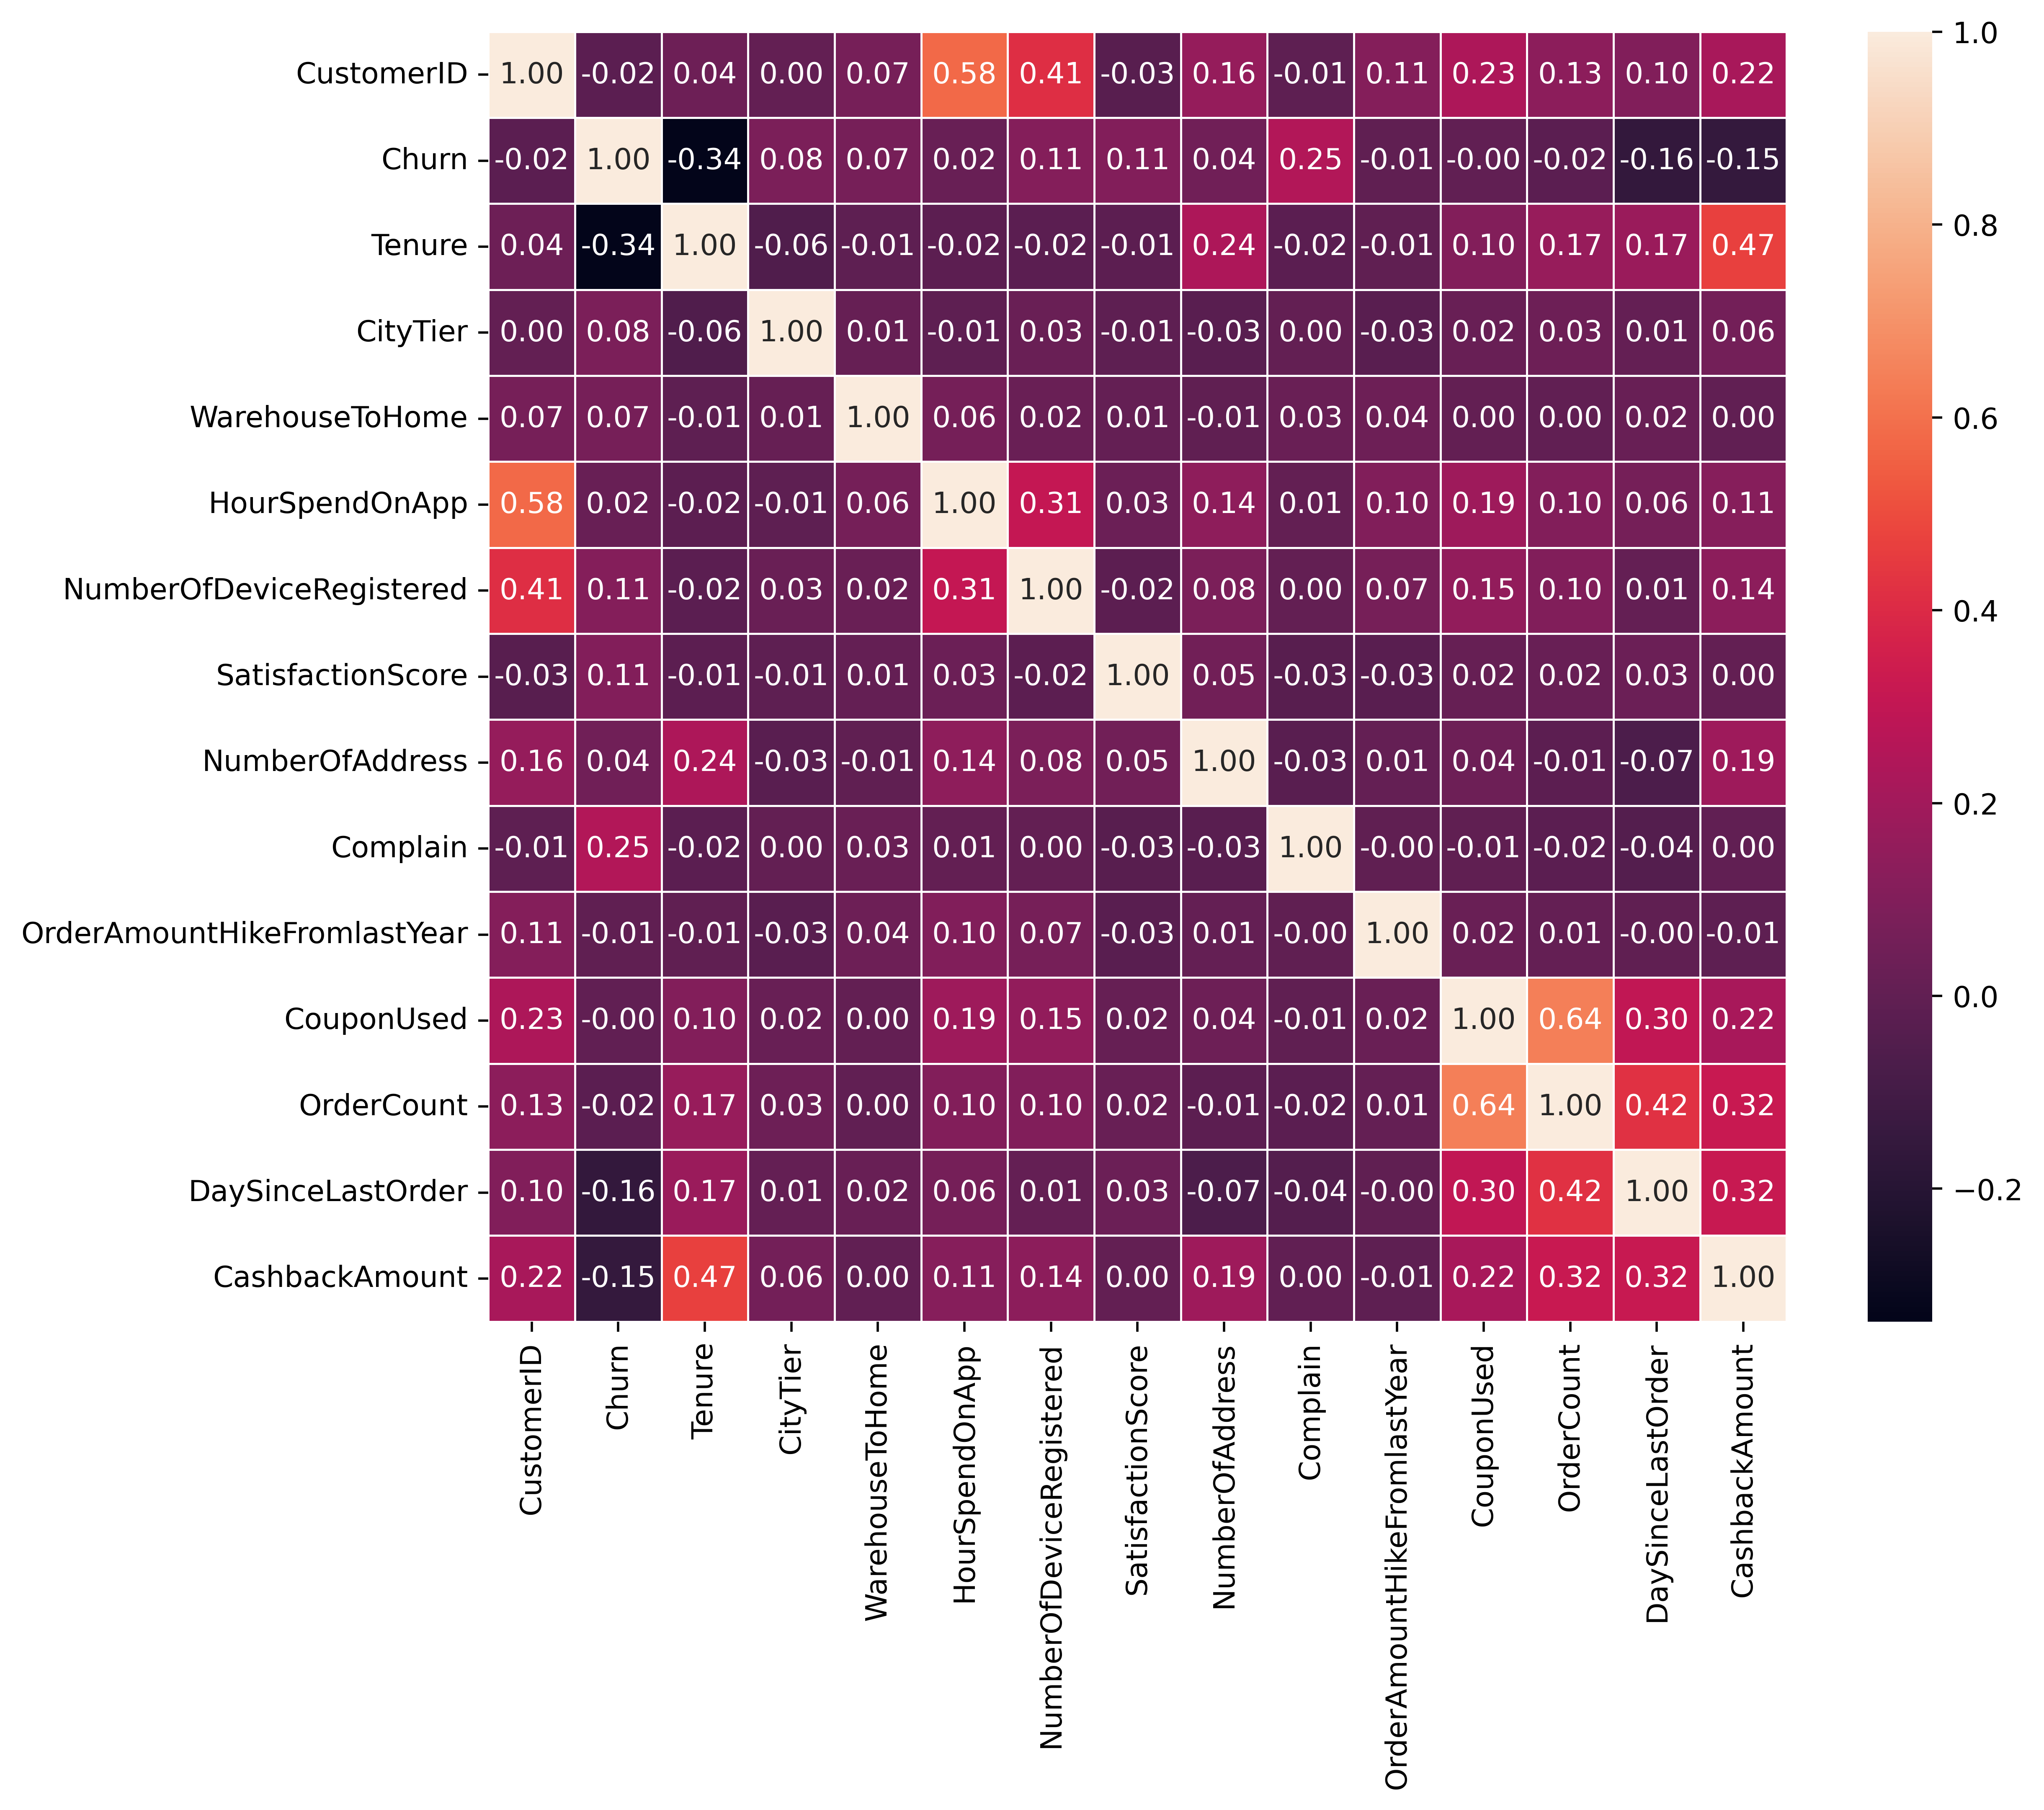

In [234]:
#Checking for correlation in the data set
corr = df.corr(method = 'pearson')
corr
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [235]:
# selecting the cat_cols and num_cols
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

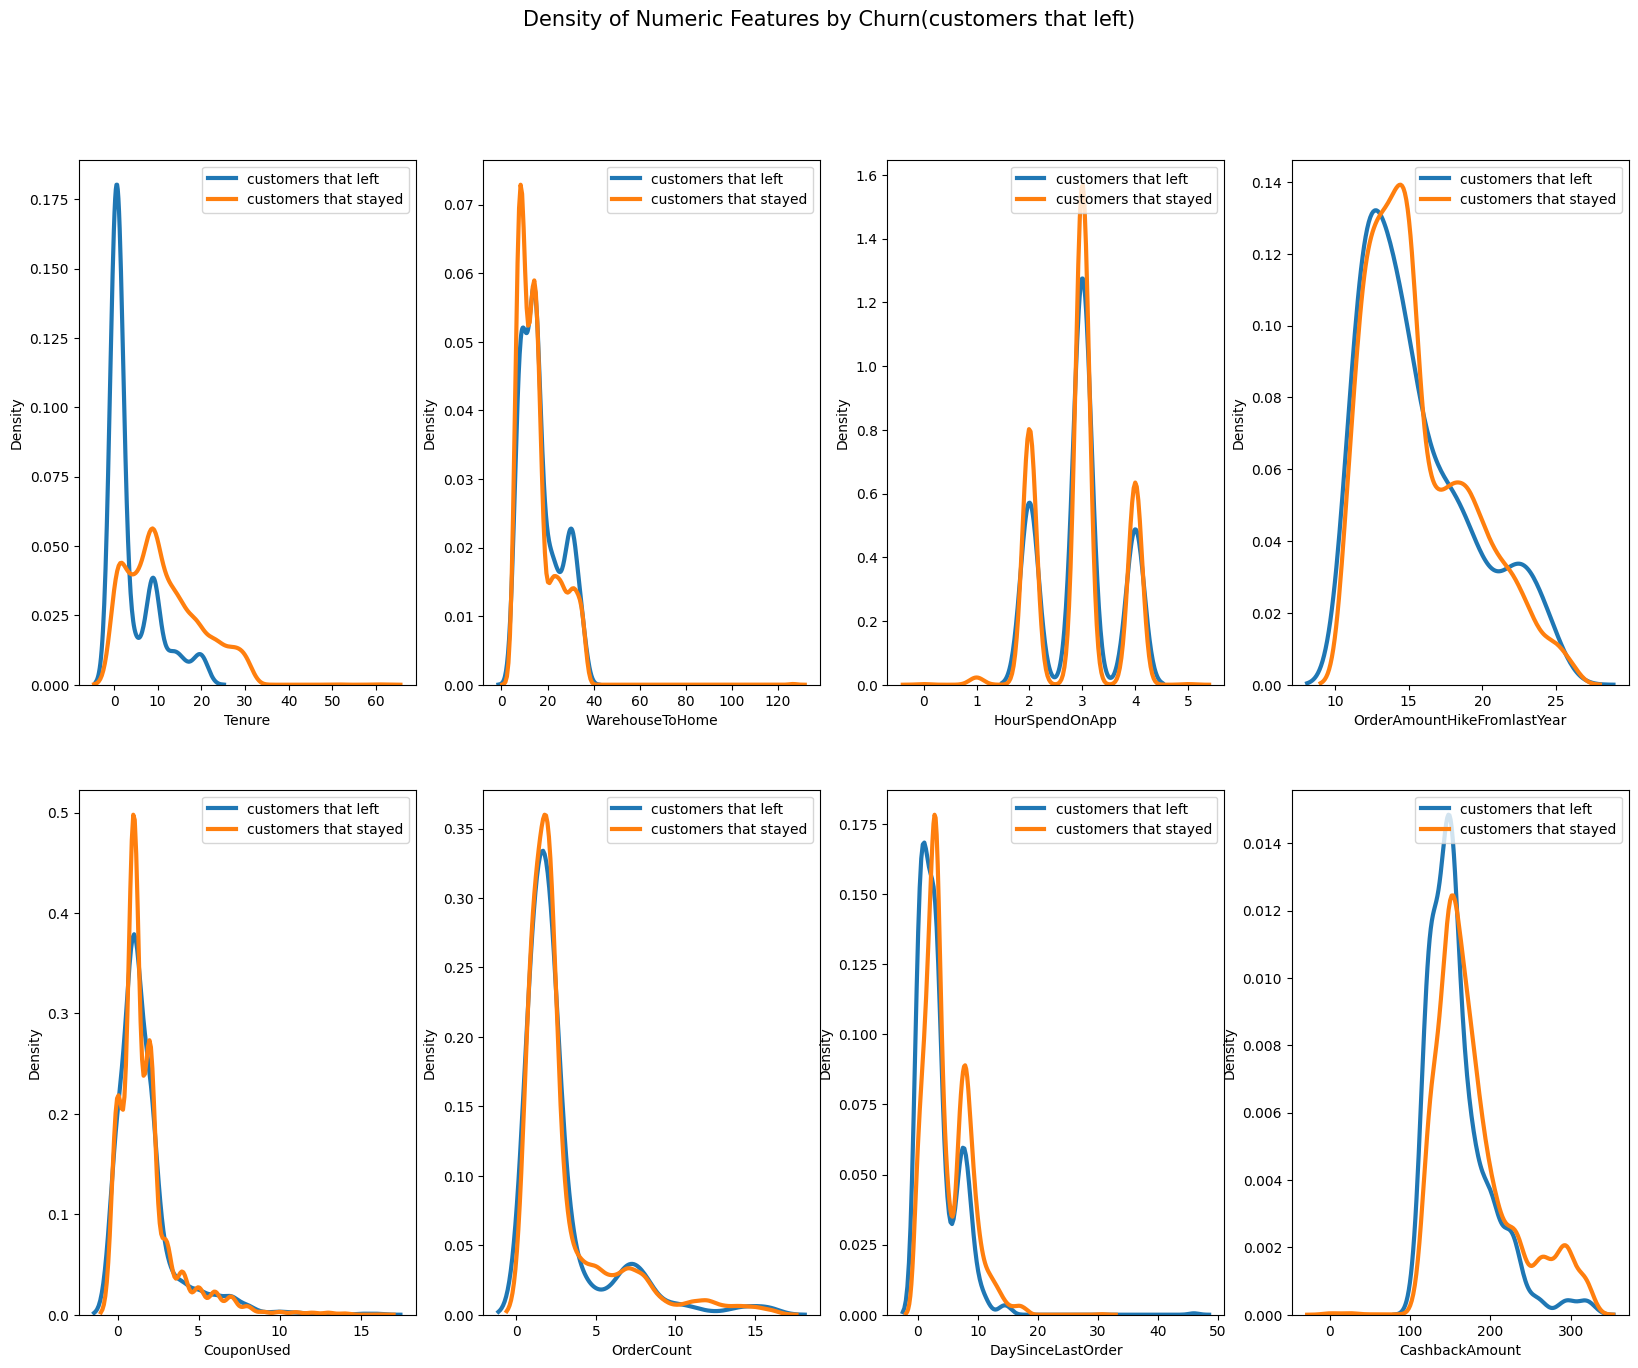

In [236]:
# To visualises the density distribution which deals with the comparison of the behaviours of customers who left (churned) and the non churn (customers who stayed)
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn(customers that left)', fontsize=15)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'customers that left',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'customers that stayed',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

From the above chart or distribution we can deduse that for:

Tenure: Clients who have been using a service for a longer period of time seem to be less likely to depart or cease using it.Longer tenure generally indicates a high degree of satisfaction, so this makes logical.

CityTier: The rate of client departure appears to be consistent between levels. Churn does not appear to be predicted by city tier.

Warehouse to Home: Customers who leave the warehouse less frequently live closer to the warehouse. Faster delivery schedules or delivery could therefore increase satisfaction.

HourSpentOnApp: Longer usage of the app is associated with fewer churning users. Engagement with an app is positive.

NumberOfDeviceRegistered: A higher number of registered devices is related to fewer churning consumers. Access across devices for customers hence enhances convenience.

CouponUsed: The use of coupons is associated with fewer customers leaving. Discounts encourage loyalty.

OrderCount: Lower customer churn is associated with order counts that are higher. Continual use creates habits.

DaySinceLastOrder: The number of clients who left increases as the time since the previous order increases. A good indicator is recent events

Complain: Although the association isn't particularly strong, more complaints are linked to more consumers who left. Disputes reduce satisfaction.

Higher satisfaction scores closely correlate with fewer customers leaving, as one might predict. driving force.

NumberOfAddress: There is a little decline in the number of abandoned clients as the number of addresses rises. Loyalty is indicated by more addresses.

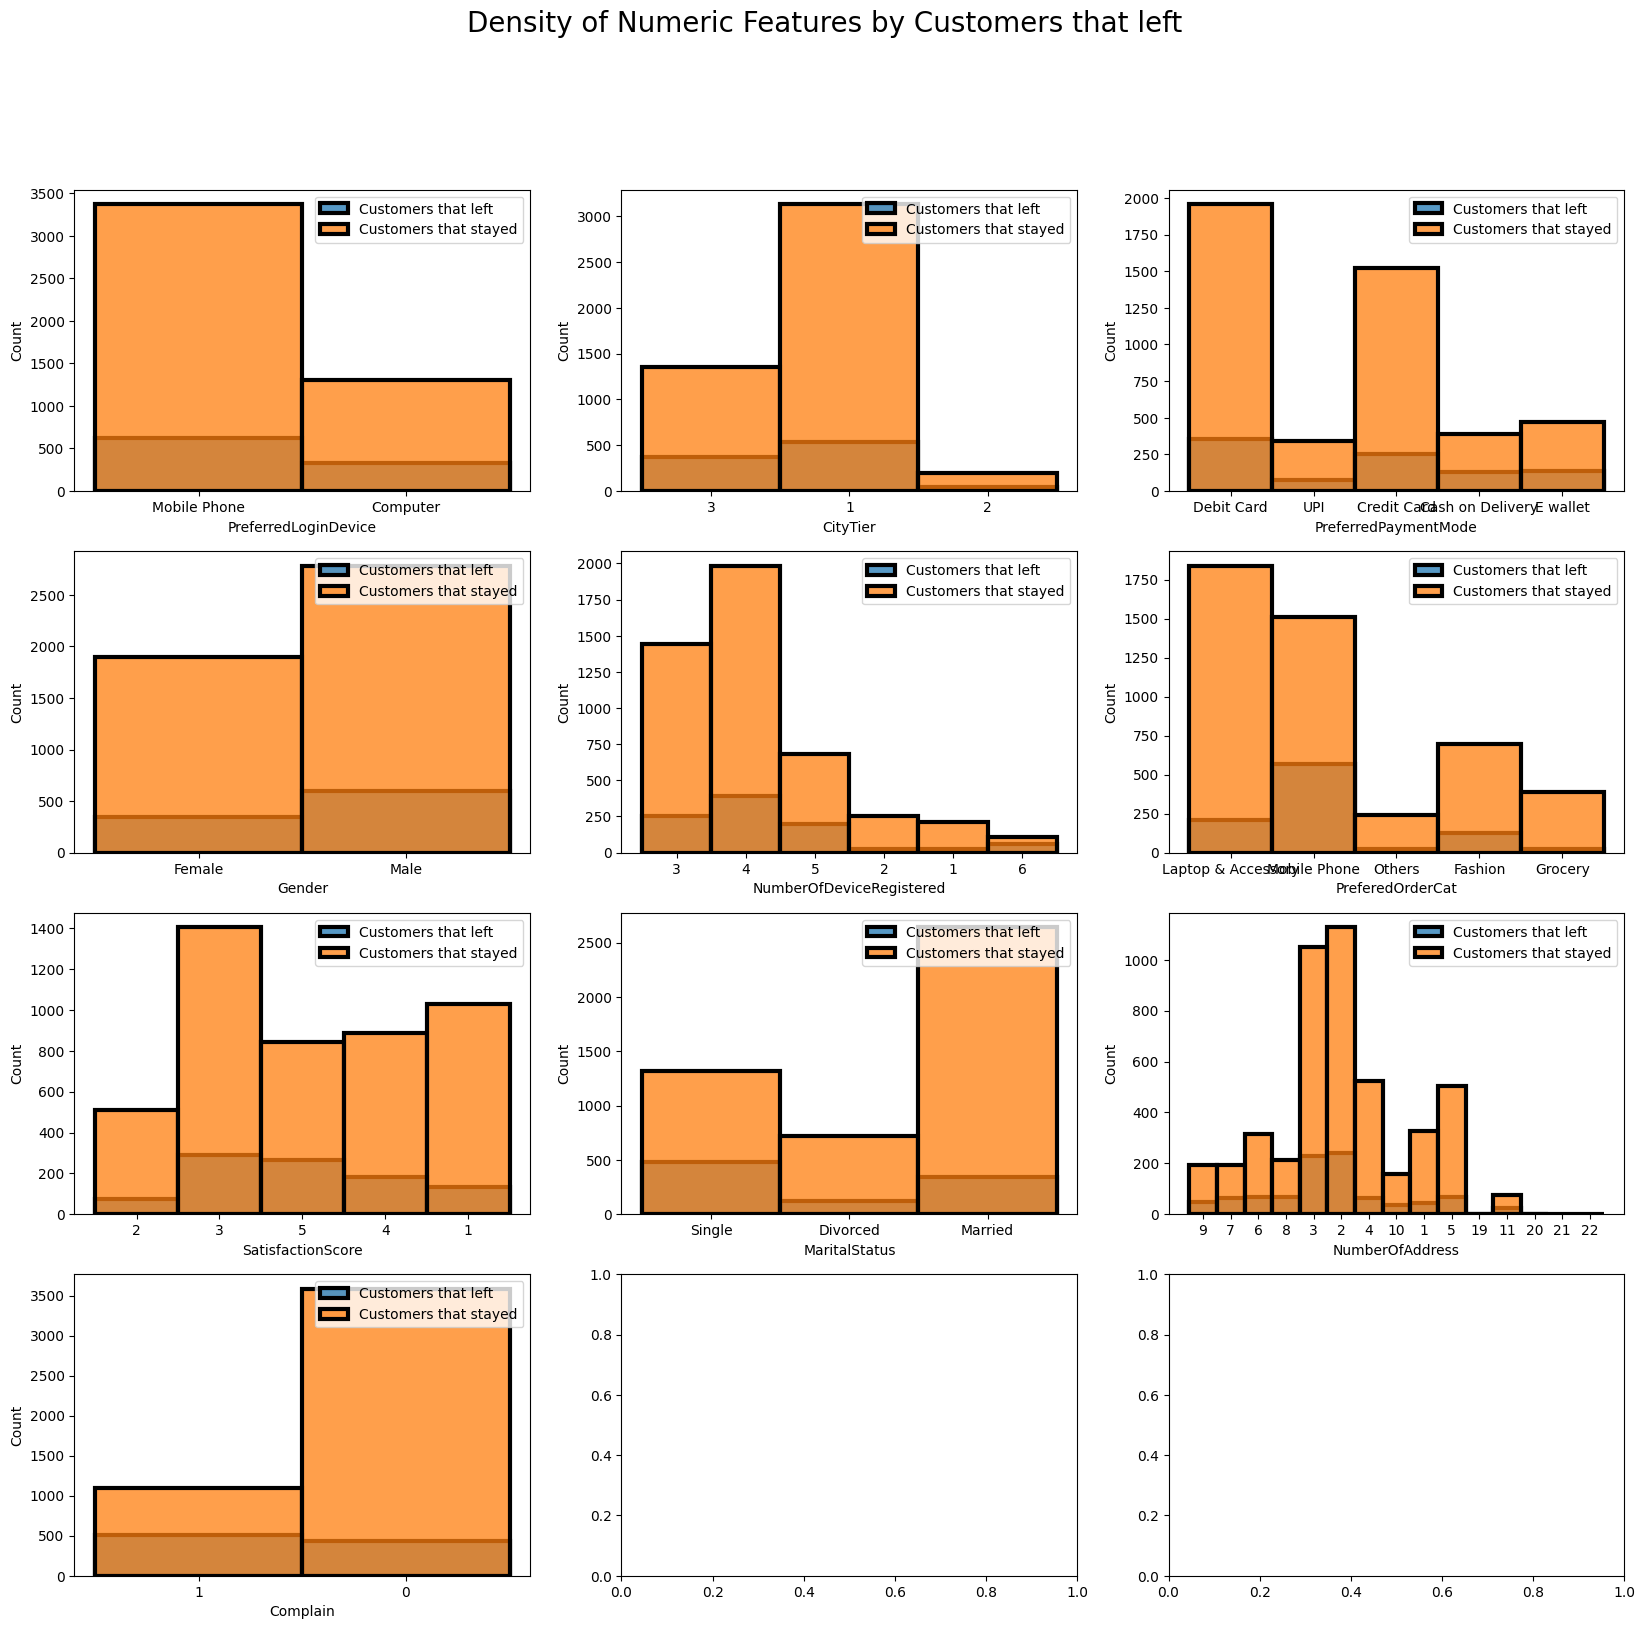

In [237]:
df_c = df2[df2['Churn']=='1'].copy()
df_nc = df2[df2['Churn']=='0'].copy()

fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Numeric Features by Customers that left', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(cat_cols):
    sns.histplot(df_c[c], linewidth= 3,
             label = 'Customers that left',ax=ax[idx])
    sns.histplot(df_nc[c], linewidth= 3,
             label = 'Customers that stayed',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

What is relationship between Gender and Churn and Which Gender has more Orders?

In [238]:
# To count the number of gender with respect to curn
df['Gender'].value_counts()
df[df['Churn'] == 'Customer that left']['Gender'].value_counts()
print("Value Counts for 'Gender':")
print(df['Gender'].value_counts())

Value Counts for 'Gender':
Male      3384
Female    2246
Name: Gender, dtype: int64


In [239]:
# Grouping the churn and gender to have a count of it
df.groupby("Churn")["Gender"].value_counts()

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: Gender, dtype: int64

In [240]:
# Grouping the PreferredLoginDevice and OrderCount to have a count of it
df.groupby("PreferredLoginDevice")["OrderCount"].value_counts()

PreferredLoginDevice  OrderCount
Computer              2.0            658
                      1.0            486
                      3.0            132
                      4.0             61
                      7.0             59
                      5.0             48
                      8.0             44
                      6.0             40
                      14.0            20
                      9.0             19
                      11.0            16
                      10.0            15
                      12.0            15
                      13.0             9
                      15.0             8
                      16.0             4
Mobile Phone          2.0           1625
                      1.0           1265
                      3.0            239
                      7.0            147
                      4.0            143
                      5.0            133
                      8.0            128
                      6.

<Axes: xlabel='Gender'>

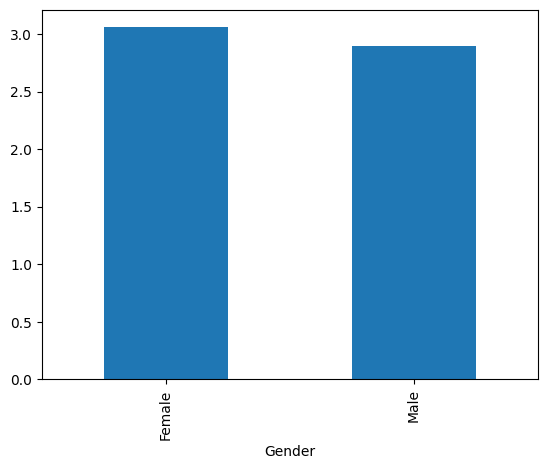

In [241]:
# To visualise the mean of gender and ordercount
gender_orders = df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')

gender_orders

From the above Bare chart, the females have more order count avg than the male

In [242]:
percentageFemale =348/2246 * 100

percentageFemale

15.49421193232413

In [243]:
percentageMale =600/3384 * 100

percentageMale

17.73049645390071

What is the MartialStatus has the highest Churn rate?

In [244]:
fig = px.pie(df, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

fig.update_layout(
  title='Customer(churn) Rate by Gender',
  legend_title='Gender'
)
fig.show()

Males are more likely to churn, as shown by the pie chart above, where 63.3% of the male population has changed.

Customer with High SatisfactionScore have high HourSpendOnApp? checking for correlation between SatisfactionScore and HourSpendOnApp?

In [245]:
# Histogram plot
fig = px.histogram(df2, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn", text_auto=True, title="<b>" + 'HourSpendOnApp Vs SatisfactionScore', color_discrete_sequence=['#BA1F33', '#3A506B', '#3E885B'])

# Update the legend items
fig.update_traces(
    legendgroup="Customers that Left",
    selector=dict(name='1')
)

# Customize the plot
fig.update_layout(
    hovermode='x',
    title_font_size=30,
    title_font_color="black",
    template="plotly",
    hoverlabel_font_size=20,
    title_x=0.5,
    xaxis_title='HourSpendOnApp',
    yaxis_title='SatisfactionScore',
)

fig.show()

From the above chart, we can see that the People with lower satisfaction scores spend less time on the app than those with a satisfaction level of 5, as can be shown, but i don't believe there is a correlation between the two.

Which MartialStatus has the highest Churn rate

In [246]:
# To know the count of marital status
df.groupby("Churn")["MaritalStatus"].value_counts()

Churn  MaritalStatus
0      Married          2642
       Single           1316
       Divorced          724
1      Single            480
       Married           344
       Divorced          124
Name: MaritalStatus, dtype: int64

Text(0, 0.5, 'Churn Rate')

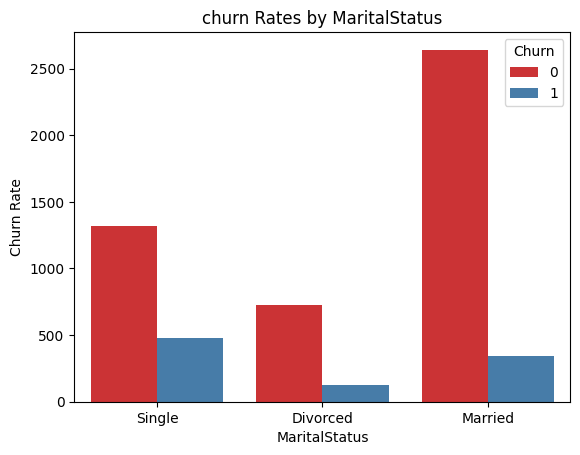

In [247]:
# visualization the maritalstatus count
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set1')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

According to the following plot, the company's top client segment is married people. Since singles are the most likely to uninstall the app, the company should think about providing services that would appeal to both single and married customers.

CityTier that has the most HourSpendOnApp?

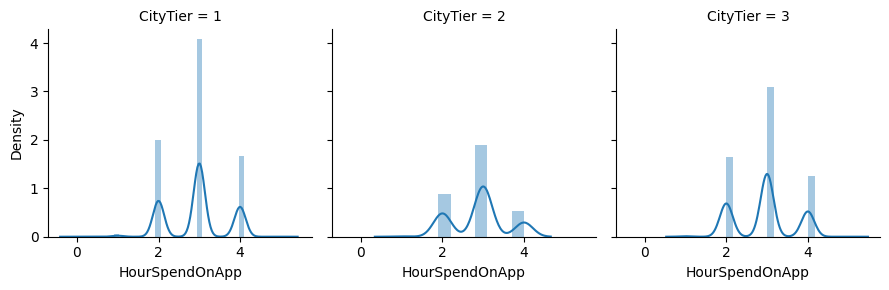

In [248]:
a = sns.FacetGrid(df, col='CityTier')
a.map(sns.distplot, 'HourSpendOnApp')

The city tier 1 has the highest number of app hours used.

To check if there is a relationship between PreferredLoginDevice and churn

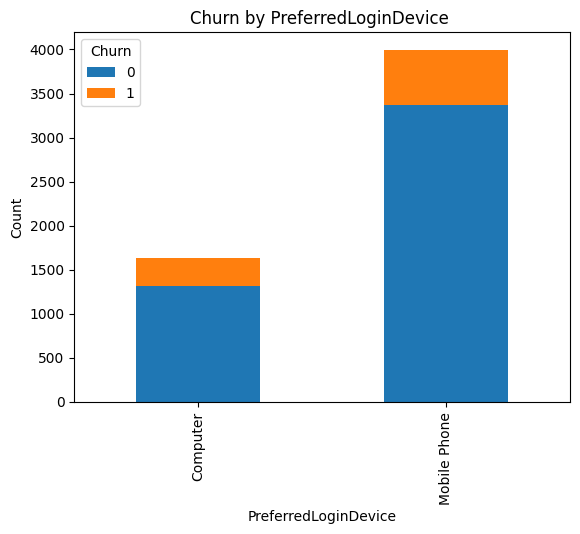

In [249]:
# Bar chart with churn rate
import seaborn as sns
# sns.catplot(x='PreferredLoginDevice', y='Churn', data=df, kind='bar')

# Grouping the data by 'OverTime' and 'Attrition', and calculate the count
grouped_data = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')
plt.show()

From the above chart, mobile phone users are likely to churn

Checking the different citytiers has different prefered products

In [250]:
earth_palette = ["#A67C52", "#8F704D", "#B09B71", "#7E786E"]


fig=px.histogram(df,x="PreferedOrderCat",facet_col="CityTier",color="CityTier",color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

The preferred categories for all city tiers, according to the aforementioned chart, are laptops and accessories, and mobile phones.

The relation between Complain and DaySinceLastOrder for churned customers

In [251]:
fig = px.histogram(df2, x="DaySinceLastOrder", color="Complain",text_auto= True , title="<b>DaySinceLastOrder Vs Complain" , color_discrete_sequence = ['#BA1F33','#3A506B'],
                   marginal="box")

# Customizing the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='DaySinceLastOrder',
yaxis_title='count',
)
fig.show()

Customers that didn't make a complaint have greater DaySinceLastOrder; however, since there was only one complaint, it is an anomaly, and if it were removed, customers with no complaints would have lower DaySinceLastOrder.

 To know if the customers who used more coupons have lower churn rates

In [252]:
# Grouping CouponUsed and Churn
df2.groupby(['CouponUsed' , 'Churn'])[['CustomerID']].count()

CustomerID
CouponUsed Churn            
0.0        0             844
           1             186
1.0        0            1975
           1             386
2.0        0            1061
           1             222
3.0        0             281
           1              46
4.0        0             167
           1              30
5.0        0             106
           1              23
6.0        0              90
           1              18
7.0        0              71
           1              18
8.0        0              33
           1               9
9.0        0              11
           1               2
10.0       0              11
           1               3
11.0       0              10
           1               2
12.0       0               8
           1               1
13.0       0               8
14.0       0               5
15.0       1               1
16.0       0               1
           1               1

In [257]:
fig = px.histogram(df2, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='count',
)
fig.show()

CityTier '1' has highest order count with 10656 orders

What is the relation between NumberOfAddress and CityTier within the churn segment

In [261]:
df.groupby("CityTier")["NumberOfAddress"].value_counts()

CityTier  NumberOfAddress
1         2                  871
          3                  832
          4                  397
          5                  377
          6                  247
          1                  228
          8                  187
          7                  173
          9                  150
          10                 129
          11                  71
          19                   1
          20                   1
          21                   1
          22                   1
2         2                   61
          3                   43
          5                   30
          1                   23
          6                   21
          4                   16
          10                  13
          7                   10
          8                   10
          11                   9
          9                    6
3         2                  437
          3                  403
          4                  175
          5      

<Axes: xlabel='CityTier', ylabel='NumberOfAddress'>

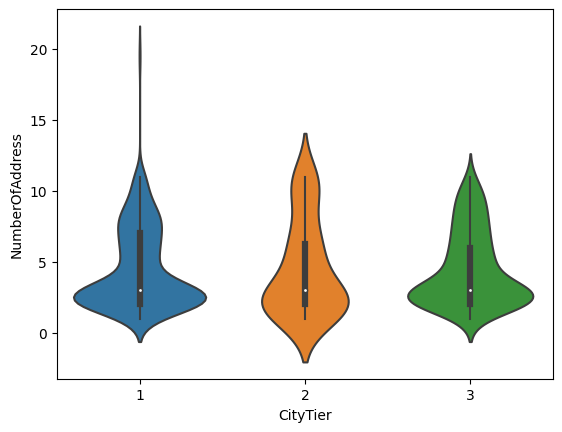

In [260]:
sns.violinplot(x='CityTier', y='NumberOfAddress', data=df[df['Churn']==1])

The data shows a negative correlation between CityTier and NumberOfAddress. In larger cities (higher CityTier), customers tend to have fewer addresses on average compared to smaller cities and towns (lower CityTier). This suggests that address density and city type influence the number of addresses a customer has.

In [255]:
# To check for cat columns
data = df[df.select_dtypes(exclude=np.number).columns].T
data

,0,1,2,3,4,5,6,7,8,9,...,5620,5621,5622,5623,5624,5625,5626,5627,5628,5629
PreferredLoginDevice,Mobile Phone,Mobile Phone,Mobile Phone,Mobile Phone,Mobile Phone,Computer,Mobile Phone,Mobile Phone,Mobile Phone,Mobile Phone,...,Mobile Phone,Mobile Phone,Mobile Phone,Computer,Mobile Phone,Computer,Mobile Phone,Mobile Phone,Computer,Mobile Phone
PreferredPaymentMode,Debit Card,UPI,Debit Card,Debit Card,Credit Card,Debit Card,Cash on Delivery,Credit Card,E wallet,Debit Card,...,Credit Card,E wallet,E wallet,Credit Card,UPI,Credit Card,Credit Card,Debit Card,Credit Card,Credit Card
Gender,Female,Male,Male,Male,Male,Female,Male,Male,Male,Male,...,Female,Male,Female,Male,Female,Male,Male,Male,Male,Male
PreferedOrderCat,Laptop & Accessory,Mobile Phone,Mobile Phone,Laptop & Accessory,Mobile Phone,Mobile Phone,Laptop & Accessory,Mobile Phone,Mobile Phone,Mobile Phone,...,Mobile Phone,Fashion,Grocery,Laptop & Accessory,Mobile Phone,Laptop & Accessory,Fashion,Laptop & Accessory,Laptop & Accessory,Laptop & Accessory
MaritalStatus,Single,Single,Single,Single,Single,Single,Divorced,Divorced,Divorced,Single,...,Single,Married,Married,Single,Single,Married,Married,Married,Married,Married


To know the relationship between features and target